In [13]:
# importing all libraries for  analysis

import  numpy as np 
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [14]:
# loading the dataset into python  environment
df=pd.read_csv(r"C:\Users\KINGNICKS-DELL\Downloads\project\fake_reviews_detection\fake_product_detection_dataset.csv")

In [15]:
# checking the dataset is balanced or  not on the basis of output columns
df["Label"].value_counts()

Label
Fake       3687
Genuine    3443
Name: count, dtype: int64

In [16]:
# checing the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            7130 non-null   object 
 1   price               7130 non-null   float64
 2   seller_id           7130 non-null   object 
 3   seller_rating       7130 non-null   float64
 4   reviews_count       7130 non-null   int64  
 5   product_rating      7130 non-null   float64
 6   image_count         7130 non-null   int64  
 7   is_verified_seller  7130 non-null   bool   
 8   discount            7130 non-null   int64  
 9   shipping_days       7130 non-null   int64  
 10  Label               7130 non-null   object 
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 564.1+ KB


In [17]:
# columns name
df.columns

Index(['category', 'price', 'seller_id', 'seller_rating', 'reviews_count',
       'product_rating', 'image_count', 'is_verified_seller', 'discount',
       'shipping_days', 'Label'],
      dtype='object')

In [18]:
# for showing dataset on the basis of statistical values
df.describe()

,price,seller_rating,reviews_count,product_rating,image_count,discount,shipping_days
count,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000,7130.000000
mean,748.795830,2.867363,2528.984572,2.923212,2.982328,45.304067,7.965919
std,428.722004,1.173507,1439.310196,1.162393,1.428709,26.368007,4.342677
min,10.090000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,381.515000,1.800000,1318.250000,1.900000,2.000000,22.000000,4.000000
50%,738.570000,2.800000,2538.500000,2.900000,3.000000,46.000000,8.000000
75%,1123.117500,3.900000,3759.000000,3.900000,4.000000,68.000000,12.000000
max,1499.950000,5.000000,4999.000000,5.000000,5.000000,90.000000,15.000000


<Axes: xlabel='category', ylabel='product_rating'>

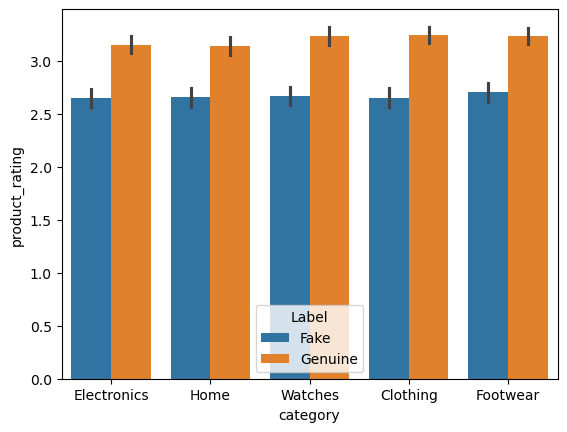

In [19]:
# for  analysis and better insights of dataset columns 
sns.barplot(df,x="category",y="product_rating",hue="Label")

In [20]:
# using pandas function for analysis
df.groupby("category")["product_rating"].mean()

category
Clothing       2.936319
Electronics    2.882003
Footwear       2.959572
Home           2.896236
Watches        2.941222
Name: product_rating, dtype: float64

In [21]:
df.groupby("category")["product_rating"].sum()

category
Clothing       4228.3
Electronics    4115.5
Footwear       4282.5
Home           4077.9
Watches        4138.3
Name: product_rating, dtype: float64

<Axes: xlabel='Label', ylabel='is_verified_seller'>

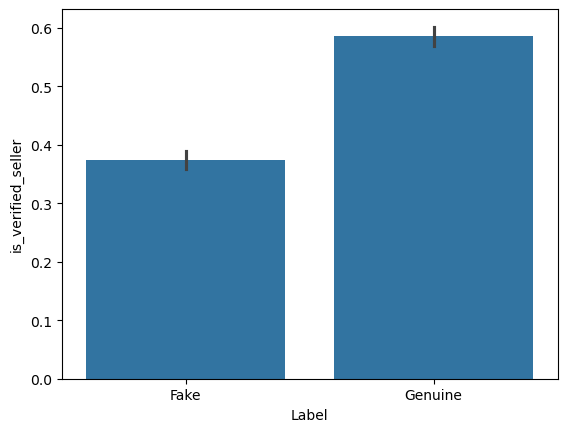

In [22]:
sns.barplot(df,y="is_verified_seller",x="Label")

In [23]:
df

,category,price,seller_id,seller_rating,reviews_count,product_rating,image_count,is_verified_seller,discount,shipping_days,Label
0,Electronics,1114.91,S350,1.9,839,3.7,5,True,75,7,Fake
1,Electronics,356.66,S716,1.1,1628,3.9,5,False,28,8,Fake
2,Electronics,1050.23,S448,2.1,1763,4.8,3,True,11,7,Fake
3,Home,870.25,S821,1.3,1866,4.1,1,True,12,7,Fake
4,Home,1030.08,S963,4.1,458,1.9,1,False,51,5,Fake
...,...,...,...,...,...,...,...,...,...,...,...
7125,Electronics,1446.93,S406,1.0,3997,1.6,3,False,49,12,Fake
7126,Home,841.34,S864,4.4,1465,2.4,4,False,5,13,Genuine
7127,Watches,1478.55,S968,3.0,1239,2.6,1,True,89,14,Genuine
7128,Home,1280.16,S203,4.3,3639,4.6,3,False,46,4,Genuine


In [24]:
df

,category,price,seller_id,seller_rating,reviews_count,product_rating,image_count,is_verified_seller,discount,shipping_days,Label
0,Electronics,1114.91,S350,1.9,839,3.7,5,True,75,7,Fake
1,Electronics,356.66,S716,1.1,1628,3.9,5,False,28,8,Fake
2,Electronics,1050.23,S448,2.1,1763,4.8,3,True,11,7,Fake
3,Home,870.25,S821,1.3,1866,4.1,1,True,12,7,Fake
4,Home,1030.08,S963,4.1,458,1.9,1,False,51,5,Fake
...,...,...,...,...,...,...,...,...,...,...,...
7125,Electronics,1446.93,S406,1.0,3997,1.6,3,False,49,12,Fake
7126,Home,841.34,S864,4.4,1465,2.4,4,False,5,13,Genuine
7127,Watches,1478.55,S968,3.0,1239,2.6,1,True,89,14,Genuine
7128,Home,1280.16,S203,4.3,3639,4.6,3,False,46,4,Genuine


Preprocessing dataset before spiliting

In [25]:
df["category"].value_counts()

category
Footwear       1447
Clothing       1440
Electronics    1428
Home           1408
Watches        1407
Name: count, dtype: int64

In [26]:
df["category"]=df["category"].map({"Footwear":0,"Clothing":1,"Electronics":2,"Home":3,"Watches":4})


In [27]:


df["Label"]=df["Label"].map({"Fake":0,"Genuine":1})


In [28]:
df.drop(columns={"seller_id"},inplace=True)

In [29]:
#df["is_verified_seller"]=df["is_verified_seller"].map({"True":0,"False":1})

In [30]:
df["is_verified_seller"]=df["is_verified_seller"].astype(dtype=object)



In [31]:
df["is_verified_seller"]=df["is_verified_seller"].astype(dtype=str)

In [32]:
df["is_verified_seller"]=df["is_verified_seller"].map({"True":0,"False":1})

In [33]:
df

,category,price,seller_rating,reviews_count,product_rating,image_count,is_verified_seller,discount,shipping_days,Label
0,2,1114.91,1.9,839,3.7,5,0,75,7,0
1,2,356.66,1.1,1628,3.9,5,1,28,8,0
2,2,1050.23,2.1,1763,4.8,3,0,11,7,0
3,3,870.25,1.3,1866,4.1,1,0,12,7,0
4,3,1030.08,4.1,458,1.9,1,1,51,5,0
...,...,...,...,...,...,...,...,...,...,...
7125,2,1446.93,1.0,3997,1.6,3,1,49,12,0
7126,3,841.34,4.4,1465,2.4,4,1,5,13,1
7127,4,1478.55,3.0,1239,2.6,1,0,89,14,1
7128,3,1280.16,4.3,3639,4.6,3,1,46,4,1


In [34]:
# using correlation fuction to check the relationship between the output column to input columns
df.corr()

,category,price,seller_rating,reviews_count,product_rating,image_count,is_verified_seller,discount,shipping_days,Label
category,1.000000,0.002358,-0.011574,0.009906,-0.009504,0.004652,0.006285,-0.007612,-0.000224,0.004184
price,0.002358,1.000000,0.000395,-0.013295,-0.013968,0.009808,-0.000469,-0.015721,0.027819,-0.021024
seller_rating,-0.011574,0.000395,1.000000,-0.003515,-0.005535,0.008884,0.006190,-0.004907,0.004513,0.347294
reviews_count,0.009906,-0.013295,-0.003515,1.000000,0.019109,-0.009356,-0.012550,0.002707,-0.018135,-0.003809
product_rating,-0.009504,-0.013968,-0.005535,0.019109,1.000000,-0.013056,0.001529,0.011111,-0.005362,0.231305
image_count,0.004652,0.009808,0.008884,-0.009356,-0.013056,1.000000,0.007074,0.007199,-0.014137,0.006846
is_verified_seller,0.006285,-0.000469,0.006190,-0.012550,0.001529,0.007074,1.000000,-0.034630,0.005643,-0.210800
discount,-0.007612,-0.015721,-0.004907,0.002707,0.011111,0.007199,-0.034630,1.000000,-0.022818,-0.068340
shipping_days,-0.000224,0.027819,0.004513,-0.018135,-0.005362,-0.014137,0.005643,-0.022818,1.000000,0.000475
Label,0.004184,-0.021024,0.347294,-0.003809,0.231305,0.006846,-0.210800,-0.068340,0.000475,1.000000


In [35]:
X=df[["category","price","seller_rating","product_rating","is_verified_seller"]]
Y=df["Label"]

In [36]:
# for normalization

from sklearn.preprocessing import MinMaxScaler

In [37]:
mm=MinMaxScaler()

In [38]:
xx=mm.fit_transform(X)
xx

array([[0.5       , 0.74155961, 0.225     , 0.675     , 0.        ],
       [0.5       , 0.23261917, 0.025     , 0.725     , 1.        ],
       [0.5       , 0.69814613, 0.275     , 0.95      , 0.        ],
       ...,
       [1.        , 0.98563623, 0.5       , 0.4       , 0.        ],
       [0.75      , 0.85247607, 0.825     , 0.9       , 1.        ],
       [0.        , 0.5001678 , 0.275     , 0.8       , 0.        ]])

In [39]:
xx=pd.DataFrame(xx,columns=X.columns,index=X.index)


In [40]:
xx

,category,price,seller_rating,product_rating,is_verified_seller
0,0.50,0.741560,0.225,0.675,0.0
1,0.50,0.232619,0.025,0.725,1.0
2,0.50,0.698146,0.275,0.950,0.0
3,0.75,0.577343,0.075,0.775,0.0
4,0.75,0.684621,0.775,0.225,1.0
...,...,...,...,...,...
7125,0.50,0.964413,0.000,0.150,1.0
7126,0.75,0.557938,0.850,0.350,1.0
7127,1.00,0.985636,0.500,0.400,0.0
7128,0.75,0.852476,0.825,0.900,1.0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,Y,train_size=0.80,random_state=123)

In [43]:
# loading all the libraries for machine learning models and also evaluating libraries

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.ensemble import BaggingClassifier

In [45]:
LR=LogisticRegression()
RDF=RandomForestClassifier()
DT=DecisionTreeClassifier()
GB=GaussianNB()
SVC=SVC()

In [46]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [47]:
print(accuracy_score(ytrain,LR.predict(xtrain)))
print(accuracy_score(ytest,LR.predict(xtest)))
print(precision_score(ytrain,LR.predict(xtrain)))
print(precision_score(ytest,LR.predict(xtest)))
print(confusion_matrix(ytrain,LR.predict(xtrain)))
print(confusion_matrix(ytest,LR.predict(xtest)))



0.6967040673211781
0.6837307152875175
0.6929046563192904
0.6598240469208211
[[2099  831]
 [ 899 1875]]
[[525 232]
 [219 450]]


In [48]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [49]:
RDF.fit(xtrain,ytrain)

RandomForestClassifier()

In [50]:
print(accuracy_score(ytrain,RDF.predict(xtrain)))
print(accuracy_score(ytest,RDF.predict(xtest)))
print(precision_score(ytrain,RDF.predict(xtrain)))
print(precision_score(ytest,RDF.predict(xtest)))
print(confusion_matrix(ytrain,RDF.predict(xtrain)))
print(confusion_matrix(ytest,RDF.predict(xtest)))



1.0
0.708976157082749
1.0
0.6941896024464832
[[2930    0]
 [   0 2774]]
[[557 200]
 [215 454]]


In [51]:
Bagging=BaggingClassifier(estimator=RandomForestClassifier(), 
n_estimators=20, random_state=42)

In [52]:
Bagging.fit(xtrain,ytrain)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=20,
                  random_state=42)

In [53]:
print(accuracy_score(ytrain,Bagging.predict(xtrain)))
print(accuracy_score(ytest,Bagging.predict(xtest)))
print(precision_score(ytrain,Bagging.predict(xtrain)))
print(precision_score(ytest,Bagging.predict(xtest)))
print(confusion_matrix(ytrain,Bagging.predict(xtrain)))
print(confusion_matrix(ytest,Bagging.predict(xtest)))



0.9637096774193549
0.7159887798036466
0.9717015803013598
0.7024539877300614
[[2853   77]
 [ 130 2644]]
[[563 194]
 [211 458]]


In [54]:
GB.fit(xtrain,ytrain)

GaussianNB()

In [55]:
print(accuracy_score(ytrain,GB.predict(xtrain)))
print(accuracy_score(ytest,GB.predict(xtest)))
print(precision_score(ytrain,GB.predict(xtrain)))
print(precision_score(ytest,GB.predict(xtest)))
print(confusion_matrix(ytrain,GB.predict(xtrain)))
print(confusion_matrix(ytest,GB.predict(xtest)))



0.6989831697054698
0.6963534361851332
0.6977179199401422
0.677710843373494
[[2122  808]
 [ 909 1865]]
[[543 214]
 [219 450]]


In [56]:
#saved model into  pickel format for easy connection with flask
model=RDF.fit(X,Y)

In [57]:
joblib.dump(model,"detection_model")

['detection_model']

In [ ]:
#df["category"]=df["category"].map({"Footwear":0,"Clothing":1,"Electronics":2,"Home":3,"Watches":4})
#df["is_verified_seller"]=df["is_verified_seller"].map({"True":0,"False":1})

In [59]:
xx

,category,price,seller_rating,product_rating,is_verified_seller
0,0.50,0.741560,0.225,0.675,0.0
1,0.50,0.232619,0.025,0.725,1.0
2,0.50,0.698146,0.275,0.950,0.0
3,0.75,0.577343,0.075,0.775,0.0
4,0.75,0.684621,0.775,0.225,1.0
...,...,...,...,...,...
7125,0.50,0.964413,0.000,0.150,1.0
7126,0.75,0.557938,0.850,0.350,1.0
7127,1.00,0.985636,0.500,0.400,0.0
7128,0.75,0.852476,0.825,0.900,1.0
